
# Mount Google Drive



In [48]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


# Import Necessary Libraries

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle

# Read dataset

In [50]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Crop_recommendation.csv")

In [51]:
# Display the first few rows in the dataset
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


# Sanity check of data

In [52]:
# Check shape
df.shape

(2200, 8)

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [54]:
# Display the missing value count
print("mising values count :")
print(df.isnull().sum())

mising values count :
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [55]:
# Display the missing value count in percent
print("mising values count :")
print(df.isnull().sum()/df.shape[0]*100)

mising values count :
N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64


In [56]:
# Check the duplicate value
print("check the duplicate values :")
print(df.duplicated().sum())

check the duplicate values :
0


In [57]:
# Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


# Exploratory Data analysis (EDA)

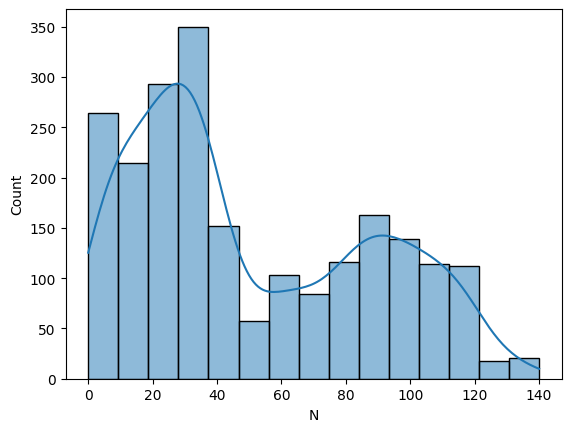

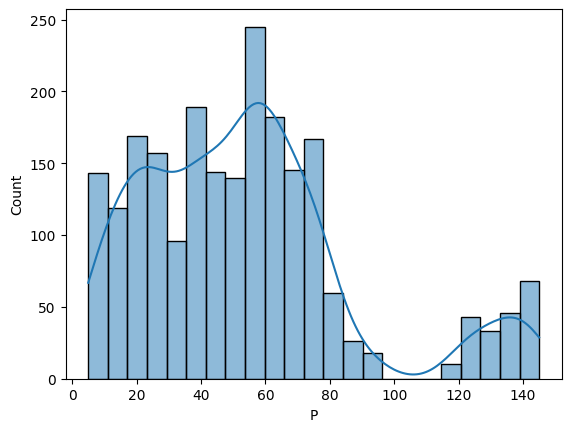

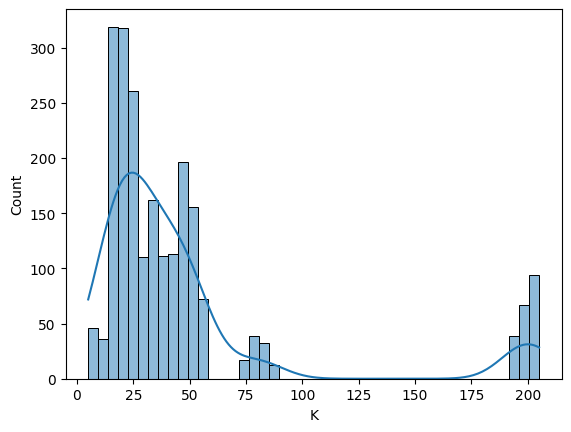

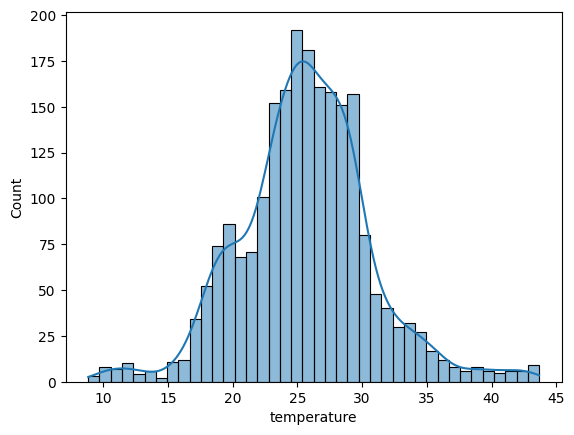

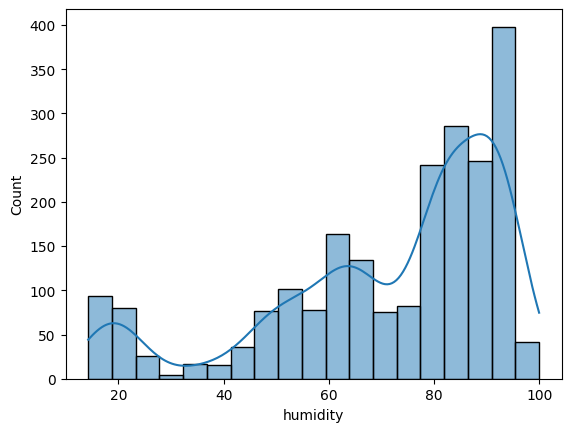

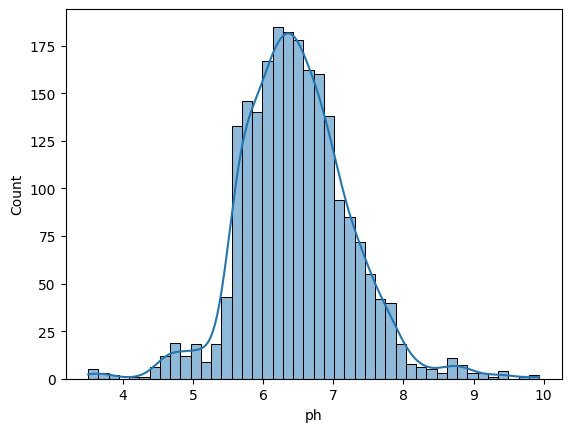

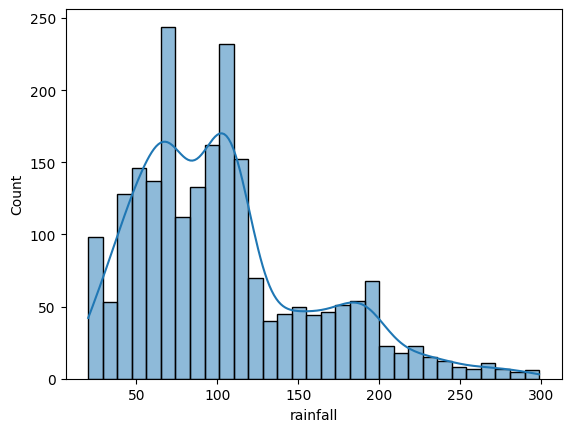

In [58]:
# check distribution for each column
for i in df.select_dtypes(include="number").columns:
    sns.histplot(df[i], kde=True)
    plt.show()

# Identify the outliers

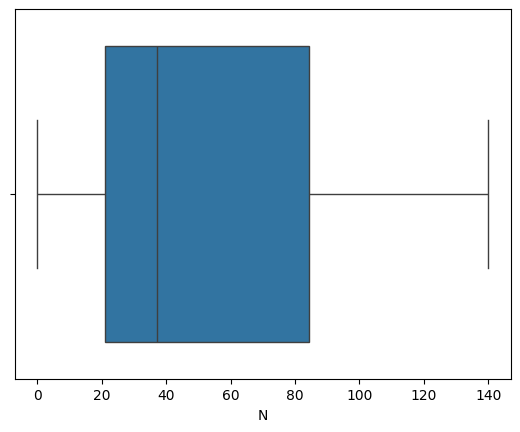

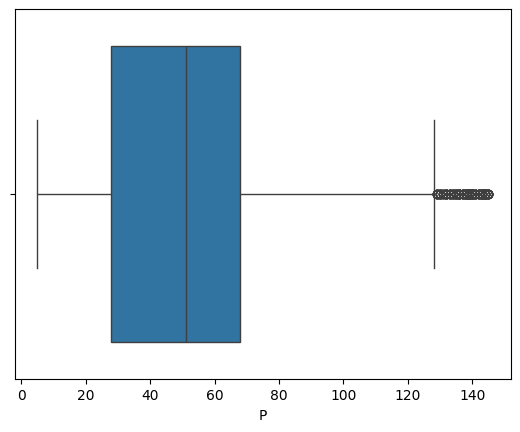

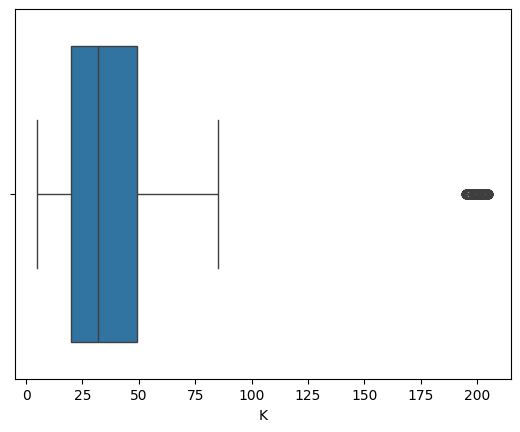

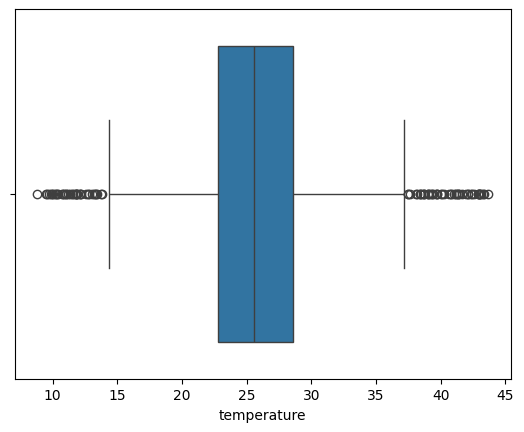

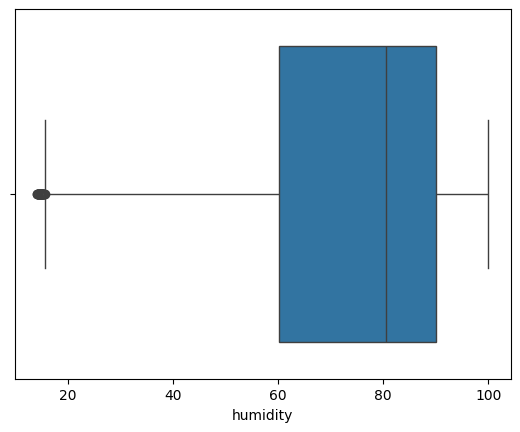

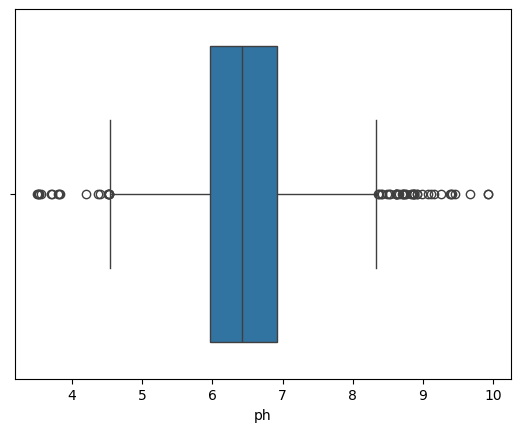

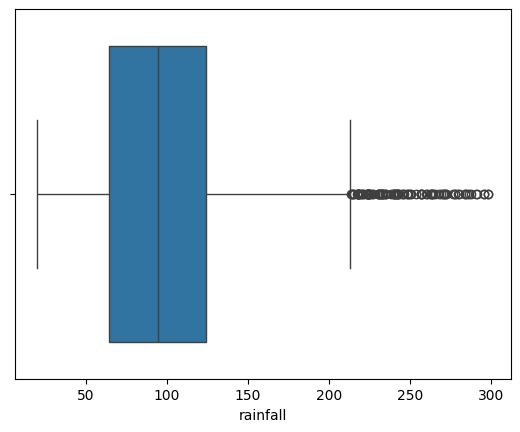

In [59]:
# check outliers for each column
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=i)
    plt.show()

# Relationship b/w target vector & feature matrix

In [60]:
df.select_dtypes(include="number").columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

<Axes: >

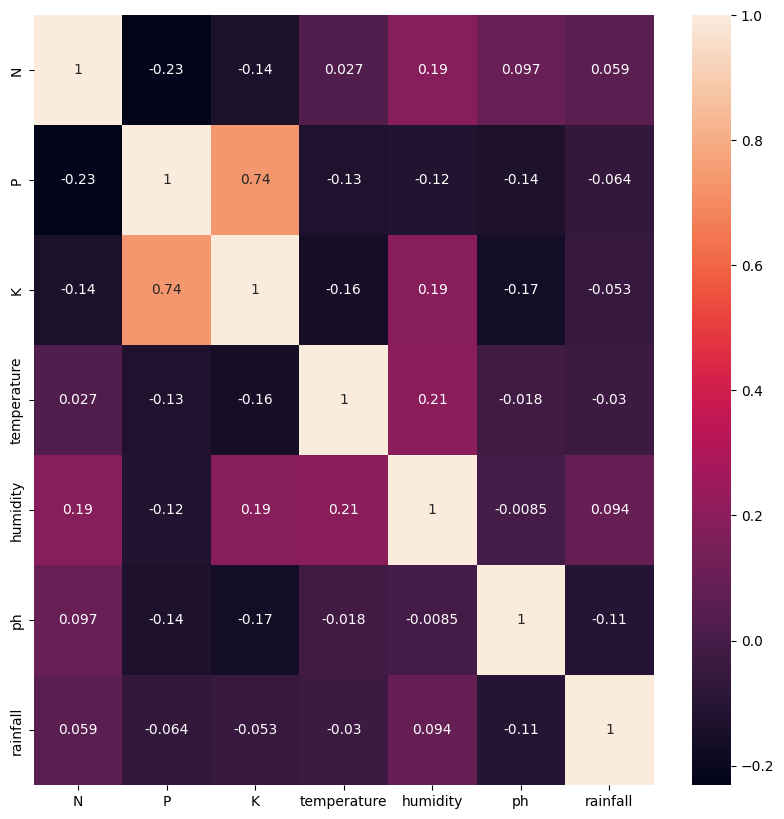

In [61]:
s=df.select_dtypes(include="number").corr()
plt.figure(figsize=(10,10))
sns.heatmap(s,annot=True)

# Outlaiers treatments

In [62]:
for i in ['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    def wisker(col):
        q1,q3 = np.percentile(col,[25,75])
        iqr = q3 - q1
        lw = q1-1.5*iqr
        uw = q3+1.5*iqr
        return lw,uw

In [63]:
for i in ['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    lw,uw = wisker(df[i])
    df[i] = np.where(df[i]<lw,lw,df[i])
    df[i] = np.where(df[i]>uw,uw,df[i])

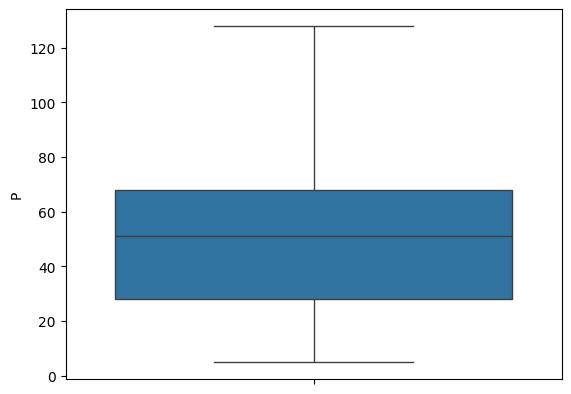

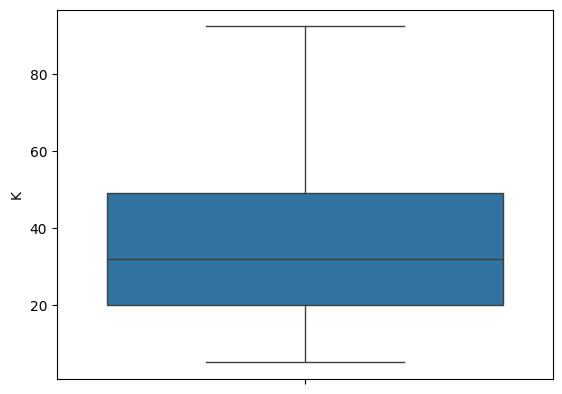

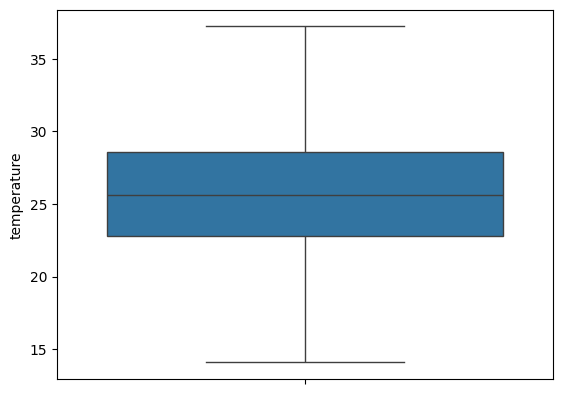

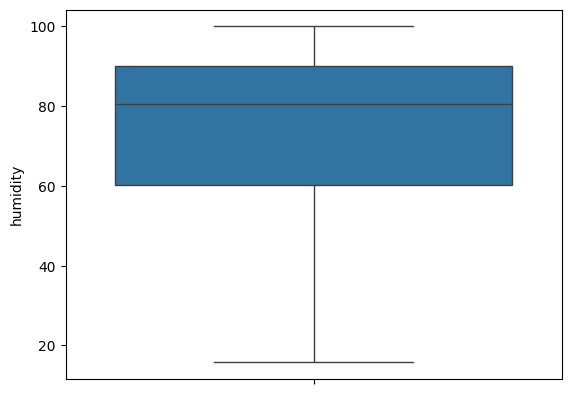

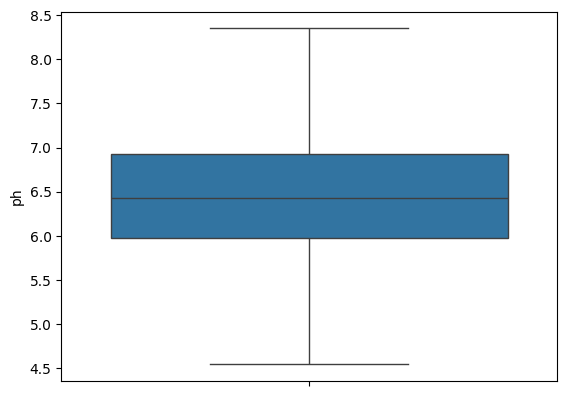

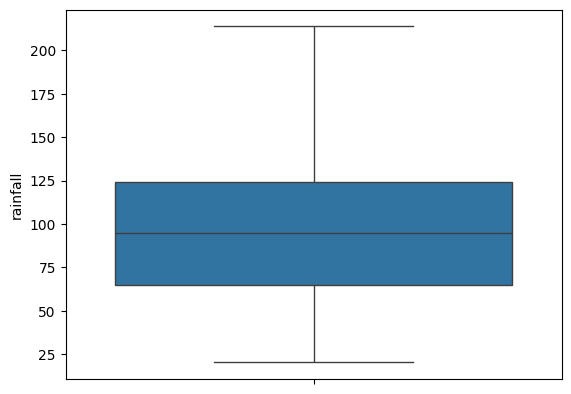

In [64]:
for i in ['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    sns.boxplot(df[i])
    plt.show()

# Encoding treatments

In [65]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [66]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [67]:
encoder.fit(df['label'])

LabelEncoder()

In [68]:
encoder.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [69]:
df['label']= encoder.transform(df['label'])
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34.0,32.0,26.774637,66.413269,6.780064,177.774507,5
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610,5
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839,5
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293,5
2199,104,18.0,30.0,23.603016,60.396475,6.779833,140.937041,5


# Dividing dataset

In [70]:
X = df.drop('label', axis=1)
y = df['label']

In [71]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85,58.0,41.0,21.770462,80.319644,7.038096,213.841241
2,60,55.0,44.0,23.004459,82.320763,7.840207,213.841241
3,74,35.0,40.0,26.491096,80.158363,6.980401,213.841241
4,78,42.0,42.0,20.130175,81.604873,7.628473,213.841241


In [72]:
y.head()

,label
0,20
1,20
2,20
3,20
4,20


# Scaling treatment

In [73]:
# # scaling using minmaxscaler

# from sklearn.preprocessing import MinMaxScaler
# mx = MinMaxScaler()
# X = pd.DataFrame(mx.fit_transform(X),columns=X.columns)
# X.head()

# Train test Split

In [74]:
# Dividing data into train data & test data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [75]:
X_train.shape


(1540, 7)

In [76]:
X_test.shape


(660, 7)

In [77]:
y_train.shape


(1540,)

In [78]:
y_test.shape

(660,)

# Training model

In [79]:
# import model

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


In [80]:
# create instances of all models


models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9666666666666667
Naive Bayes  with accuracy : 0.9924242424242424
Support Vector Machine  with accuracy : 0.9757575757575757
K-Nearest Neighbors  with accuracy : 0.9818181818181818
Decision Tree  with accuracy : 0.9818181818181818
Random Forest  with accuracy : 0.9954545454545455
Bagging  with accuracy : 0.9893939393939394
AdaBoost  with accuracy : 0.1590909090909091
Gradient Boosting  with accuracy : 0.9833333333333333
Extra Trees  with accuracy : 0.8757575757575757


In [81]:
# finally selected randomforest model

svc = SVC(random_state = 42)
svc.fit(X_train,y_train)
ypred = svc.predict(X_train)
accuracy_score(y_train,ypred)

0.9824675324675325

In [82]:
# # finally selected randomforest model

# rfc = RandomForestClassifier(criterion ='entropy', n_estimators = 300,random_state = 42)
# rfc.fit(X_train,y_train)
# ypred = rfc.predict(X_test)
# accuracy_score(y_test,ypred)

In [83]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    # features = mx.fit_transform(features).reshape(1,-1)
    prediction = svc.predict(features)
    return prediction[0]

N =60
P = 38
k =17
temperature =18.41932981
humidity= 64.23580251
ph = 6.474476516
rainfall =76.41312437


# N = float(input("Enter the Nitrogen value : "))
# P = float(input("Enter the Phosphorus value : "))
# k = float(input("Enter the Potassium value : "))
# temperature = float(input("Enter the Temperature value : "))
# humidity = float(input("Enter the Humidity value :"))
# ph = float(input("Enter the PH value : "))
# rainfall = float(input("Enter the Rainfall value : "))

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {0:'apple', 1:'banana', 2:'blackgram', 3:'chickpea', 4:'coconut', 5:'coffee',
       6:'cotton', 7:'grapes', 8:'jute', 9:'kidneybeans', 10:'lentil', 11:'maize',
       12:'mango', 13:'mothbeans', 14:'mungbean', 15:'muskmelon', 16:'orange', 17:'papaya',
       18:'pigeonpeas', 19:'pomegranate', 20:'rice', 21:'watermelon'}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")


maize is a best crop to be cultivated 


In [84]:
with open('svc.pkl','wb') as file:
  pickle.dump(svc, file)

In [85]:
with open('/content/drive/My Drive/svc.pkl', 'wb') as file:
    pickle.dump(svc, file)